# A Visualization for Ford GoBike
## by Walter Solares


## Investigation Overview

> The goal of this exploration visualization is to find out information about the users and who they are. 

## Dataset Overview

> The dataset is information about the users who use the Ford Go Bike system for transportation. It gives insight such as the start and stop of the location, the location, gender, age, and distance.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [72]:
#View the first 5 of the dataframe
clean_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,user_age,start_month,start_week,start_hour,end_hour,user_age_bins
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,No,NaN,NaN,NaN,33,January,Wed,22,19,25 - 39
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,No,NaN,NaN,NaN,23,January,Wed,14,10,10 - 24
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,No,NaN,NaN,NaN,28,January,Wed,19,6,25 - 39
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,...,No,NaN,NaN,NaN,31,January,Wed,23,0,25 - 39
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,...,No,NaN,NaN,NaN,39,January,Wed,23,23,25 - 39


### What is the structure of your dataset?

> There are 1863721 entries and 17 columns.

### What is/are the main feature(s) of interest in your dataset?

>1. The age group that are using the most
>2. Male vs Female users
>3. Age Make a Difference?
>4. What month GoBike is used the most
>5. Month, Age, and Gender Affect Usage

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features or columns that I believe are going to help the most are the Age, Gender, and the start_time and end_time (possibly duration_sec).

## Univariate Exploration


### Age group that are using the most

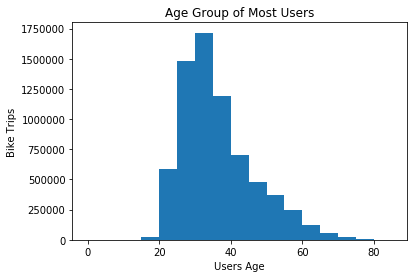

In [36]:
#Creating a histogram for the age group that are using the most
bins = np.arange(0, 90, 5)
plt.hist(data = clean_df, x = 'user_age', bins = bins);
plt.title("Age Group of Most Users");
plt.xlabel('Users Age');
plt.ylabel('Bike Trips');

The above histogram shows us that most users are between the age of 20 to 40 and gives us a right skewed histogram. This brings up to investigate the amount of users that are Male vs Female.

### Male vs Female users

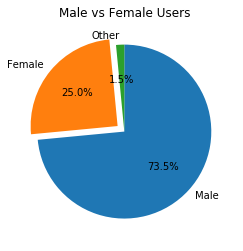

In [37]:
gender_counts = clean_df.member_gender.value_counts()
explode = (0, 0.1, 0)
plt.pie(gender_counts, explode = explode, labels = gender_counts.index, autopct = '%1.1f%%', startangle = 90, counterclock = False);
plt.title('Male vs Female Users');

The Male vs Female scenario here shows us that a little under 75% of the users are Male, this could mean a variety of things that we cannot look into with the current dataset. Lets see if there are more subscribers vs customer.

### Customer vs Subscriber

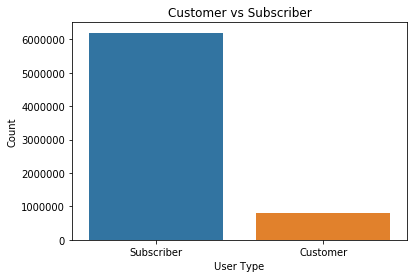

In [38]:
sb.countplot(data = clean_df, x = 'user_type')
plt.title('Customer vs Subscriber');
plt.xlabel('User Type');
plt.ylabel('Count');

Looks like there are more members/users subscribed rather then the casual users that probably use only once in awhile. We can wonder if age has anything to do with it?

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of all points seem rather normal and expected, except the age. Bike riders over the age of 90 seems highly unlikely but not impossible. For that reason, I decided to only display users under the age of 90.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Again, nothing to unusual, but I did however tidy up some data. The data that required some tidying was the age group as it was a float and just the birth year. Calculating it to todays year helped in determining what the actual age was.

## Bivariate Exploration


In [39]:
#Create a field for age groups
clean_df['user_age_bins'] = clean_df['user_age'].apply(lambda x: '10 - 24' if 10<x<=24
                                                          else '25 - 39' if 24<x<=39
                                                          else '40 - 54' if 39<x<=54
                                                          else '55 - 69' if 54<x<=69
                                                          else '70 - 89' if 69<x<=89
                                                          else x) 

### Age Make a Difference?

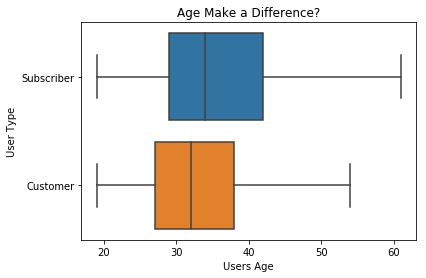

In [40]:
sb.boxplot(data = clean_df, x = 'user_age', y = 'user_type', showfliers=False);
plt.title('Age Make a Difference?');
plt.xlabel('Users Age');
plt.ylabel('User Type');

The graph above displays more subscribers as we previously saw but we notice that the majority of users average to be around the same age. Maybe the age and time of the year? We can see the data between user age and hour of the day to get a little more information. We may also need to clean some more for gathering months, days and hours.

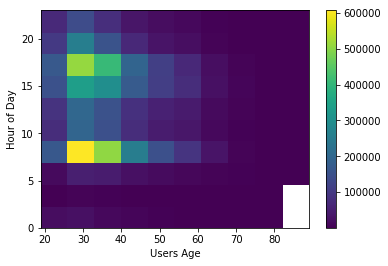

In [71]:
start_month_counts = clean_df.start_month.value_counts()
plt.hist2d(data = clean_df, x = 'user_age', y = 'start_hour', cmin = 0.5);
plt.colorbar()
plt.xlabel('Users Age');
plt.ylabel('Hour of Day');

The busiest time of the day is from 6 AM to 9 AM, then we see a decline in usage until 4 PM to 6 PM. This again are the working class going to work, then leaving work. A very healthy community.

### What month GoBike is used the most

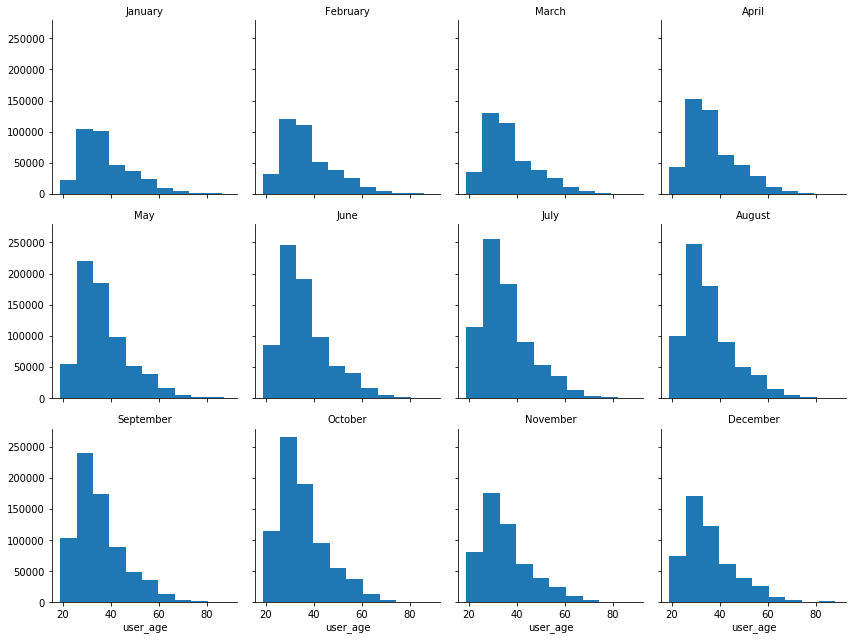

In [41]:
bin_edges = np.arange(18, 89+2, 2)
g = sb.FacetGrid(data = clean_df, col = 'start_month', col_wrap = 4);
g.map(plt.hist, 'user_age');
g.set_titles('{col_name}');

The age of users is about the same where ages 20 to 40 seem to have the most usage, but we see a drop in usage. November seems to be where the decline starts to significantly drop up until April.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I noticed a difference in users and usage. Users in general seem to be in the prime of the working class commuting to work. This is interesting because this gives us information that the working class are relying on this form of transportation to and from work. The other visualization is we notice from November to April, the usage drops significantly. This must mean it may be to cold for a lot of users, which explains the drop.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Since we see the biggest users are the working class, does the time of the month affect the gender usage? 

## Multivariate Exploration


### Month, Age, and Gender Affect Usage

In [ ]:
#month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#months = pd.api.types.CategoricalDtype(ordered = True, categories = month)
#clean_df['start_month'] = clean_df['start_month'].astype(months)
#testify = clean_df.loc[clean_df['member_gender'].isin(['Male', 'Female', 'Other'])]

In [ ]:
#q = sb.boxplot(data = testify, x = 'start_month', y = 'user_age', hue = 'member_gender', fliersize = 1)
#q.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))
#plt.xticks(rotation = 45)

In [42]:
age_gender_month = clean_df[clean_df['user_type'] == 'Subscriber'].groupby(['start_month', 'user_age', 'member_gender']).agg({'bike_id':'count'}).reset_index()

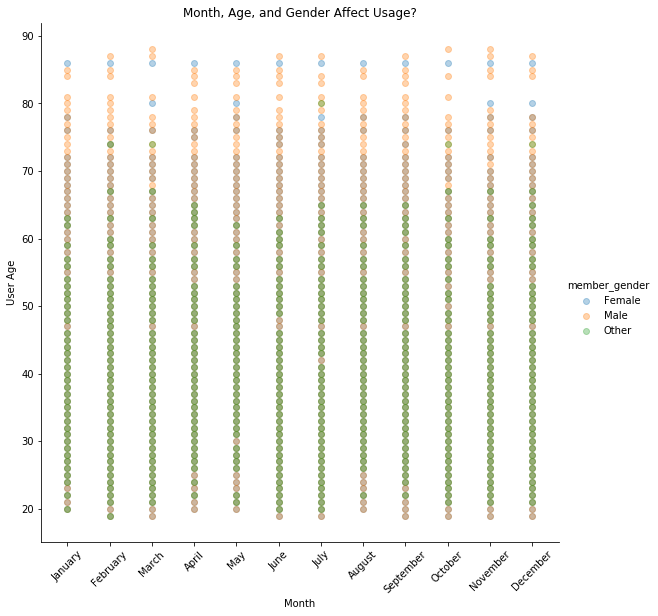

In [43]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#s = sb.FacetGrid(data = age_gender_month, x = 'start_month', y = 'user_age', hue = 'member_gender', order = month)
s = sb.FacetGrid(data = age_gender_month, hue = 'member_gender', size = 8)
s.map(plt.scatter, 'start_month', 'user_age', alpha = 1/3)
s.add_legend()
plt.title('Month, Age, and Gender Affect Usage?')
#tick_locs = [10, 20, 30, 40, 50, 60, 80]
#plt.yticks(tick_locs)
plt.xlabel('Month')
plt.ylabel('User Age')
s.set_xticklabels(month, rotation = 45);

Subscribers are the highest amount of users, but from what we can see here is that users we described as the 'working class' seem to not answer whether they are Male or Female. We also see most, if not all, subscribers that are Female dont care if they are listed as Female after the age of ~78.

In [44]:
age_gender_month = clean_df[clean_df['user_type'] == 'Customer'].groupby(['start_month', 'user_age', 'member_gender']).agg({'bike_id':'count'}).reset_index()

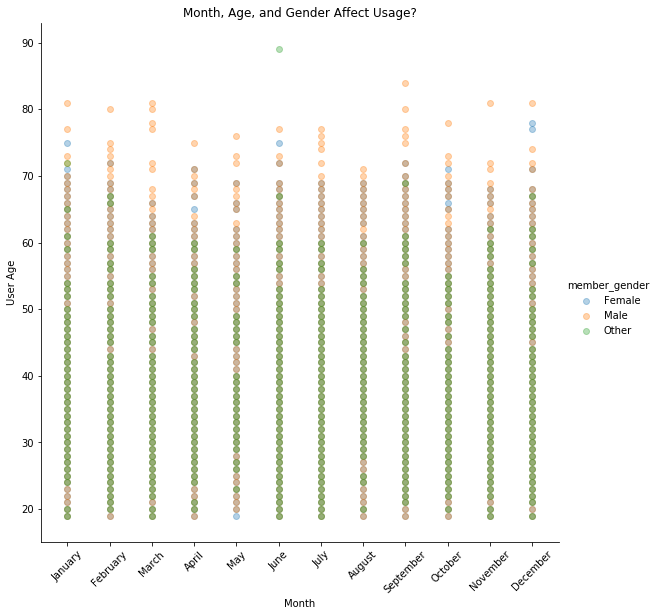

In [45]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#s = sb.FacetGrid(data = age_gender_month, x = 'start_month', y = 'user_age', hue = 'member_gender', order = month)
s = sb.FacetGrid(data = age_gender_month, hue = 'member_gender', size = 8)
s.map(plt.scatter, 'start_month', 'user_age', alpha = 1/3)
s.add_legend()
plt.title('Month, Age, and Gender Affect Usage?')
#tick_locs = [10, 20, 30, 40, 50, 60, 80]
#plt.yticks(tick_locs)
plt.xlabel('Month')
plt.ylabel('User Age')
s.set_xticklabels(month, rotation = 45);

The trend here for Customers seem to follow along the Subscribers. The most noticeable thing here is Customers below the age of 80 seem to stop being users.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> My goal here was to observe the correlation between the month, age, and gender. In terms of gender, there wasn't a significant change, but we know more about FordGo Bike users.

### Were there any interesting or surprising interactions between features?

> Here was probably the biggest find! We see now that subscribers have the highest amount of users whether they are lying about their age or not. This is great news for the company as they are users who keep coming back, though may need to somehow attract more Female users. As for the customer users, there was no significant change besides the lower age range of users.

## Sources

>1. https://medium.com/@kadek/elegantly-reading-multiple-csvs-into-pandas-e1a76843b688
>2. https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
>3. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html
>4. https://www.geeksforgeeks.org/python-pandas-series-dt-strftime/

In [ ]:
! jupyter nbconvert FordGoBike_Slides.ipynb --to slides --post serve --template output_toggle